# Introducción a TensorFlow

In [91]:
import matplotlib.pyplot as plt
import tensorflow as tf
import skimage as imd
import pandas as pd
import numpy as np
import random
import os

from skimage import transform
from skimage.color import rgb2gray

In [2]:
x1 = tf.constant([1,2,3,4,5])
x2 = tf.constant([6,7,8,9,10])

In [3]:
res = tf.multiply(x1,x2)
print(res)

tf.Tensor([ 6 14 24 36 50], shape=(5,), dtype=int32)


In [6]:
sess = tf.compat.v1.Session()
print(res)
sess.close

tf.Tensor([ 6 14 24 36 50], shape=(5,), dtype=int32)


<bound method BaseSession.close of <tensorflow.python.client.session.Session object at 0x00000195847076A0>>

In [9]:
config = tf.compat.v1.ConfigProto(log_device_placement = True)
config = tf.compat.v1.ConfigProto(allow_soft_placement = True)

## Aprendizaje neuronal de las señales de tráfico

In [44]:
def load_ml_data(data_directory):
    dirs = [d for d in os.listdir(data_directory)
           if os.path.isdir(os.path.join(data_directory,d))]
    
    labels = []
    images = []
    for d in dirs:
        label_dir = os.path.join(data_directory, d)
        file_name = [os.path.join(label_dir, f)
                    for f in os.listdir(label_dir)
                    if f.endswith('.ppm')]
        for f in file_name:
            images.append(imd.io.imread(f))
            labels.append(int(d))
    return images, labels

In [31]:
main_dir = "../../datasets/belgian/"
train_data_dir = os.path.join(main_dir, "Training")
test_data_dir = os.path.join(main_dir, "Testing")

In [45]:
images, labels = load_ml_data(train_data_dir)

In [57]:
len(set(labels))

62

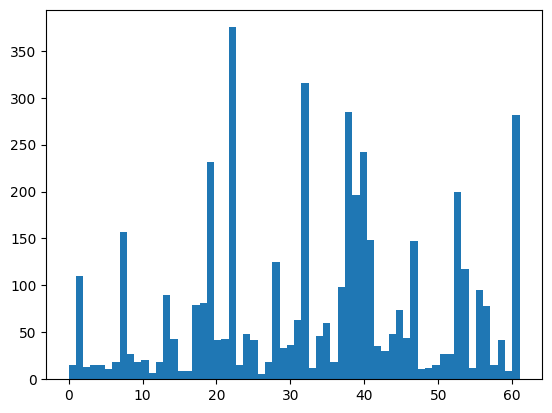

In [61]:
plt.hist(labels, len(set(labels)))
plt.show()

In [66]:
rand_signs = random.sample(range(0, len(labels)), 6)
rand_signs

[435, 3232, 2703, 4525, 4329, 819]

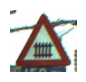

Forma:(98, 104, 3), min:11, max:255


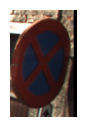

Forma:(229, 141, 3), min:0, max:255


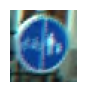

Forma:(49, 45, 3), min:0, max:255


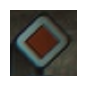

Forma:(59, 59, 3), min:4, max:149


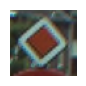

Forma:(51, 51, 3), min:10, max:218


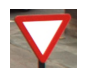

Forma:(128, 144, 3), min:14, max:255


In [74]:
for i in range(len(rand_signs)):
    temp_im = images[rand_signs[i]]
    plt.subplot(1, 6, i+1)
    plt.axis('off')
    plt.imshow(images[rand_signs[i]])
    plt.subplots_adjust(wspace = 0.3)
    plt.show()
    print('Forma:{0}, min:{1}, max:{2}'.format(temp_im.shape,
                                              temp_im.min(),
                                              temp_im.max()))

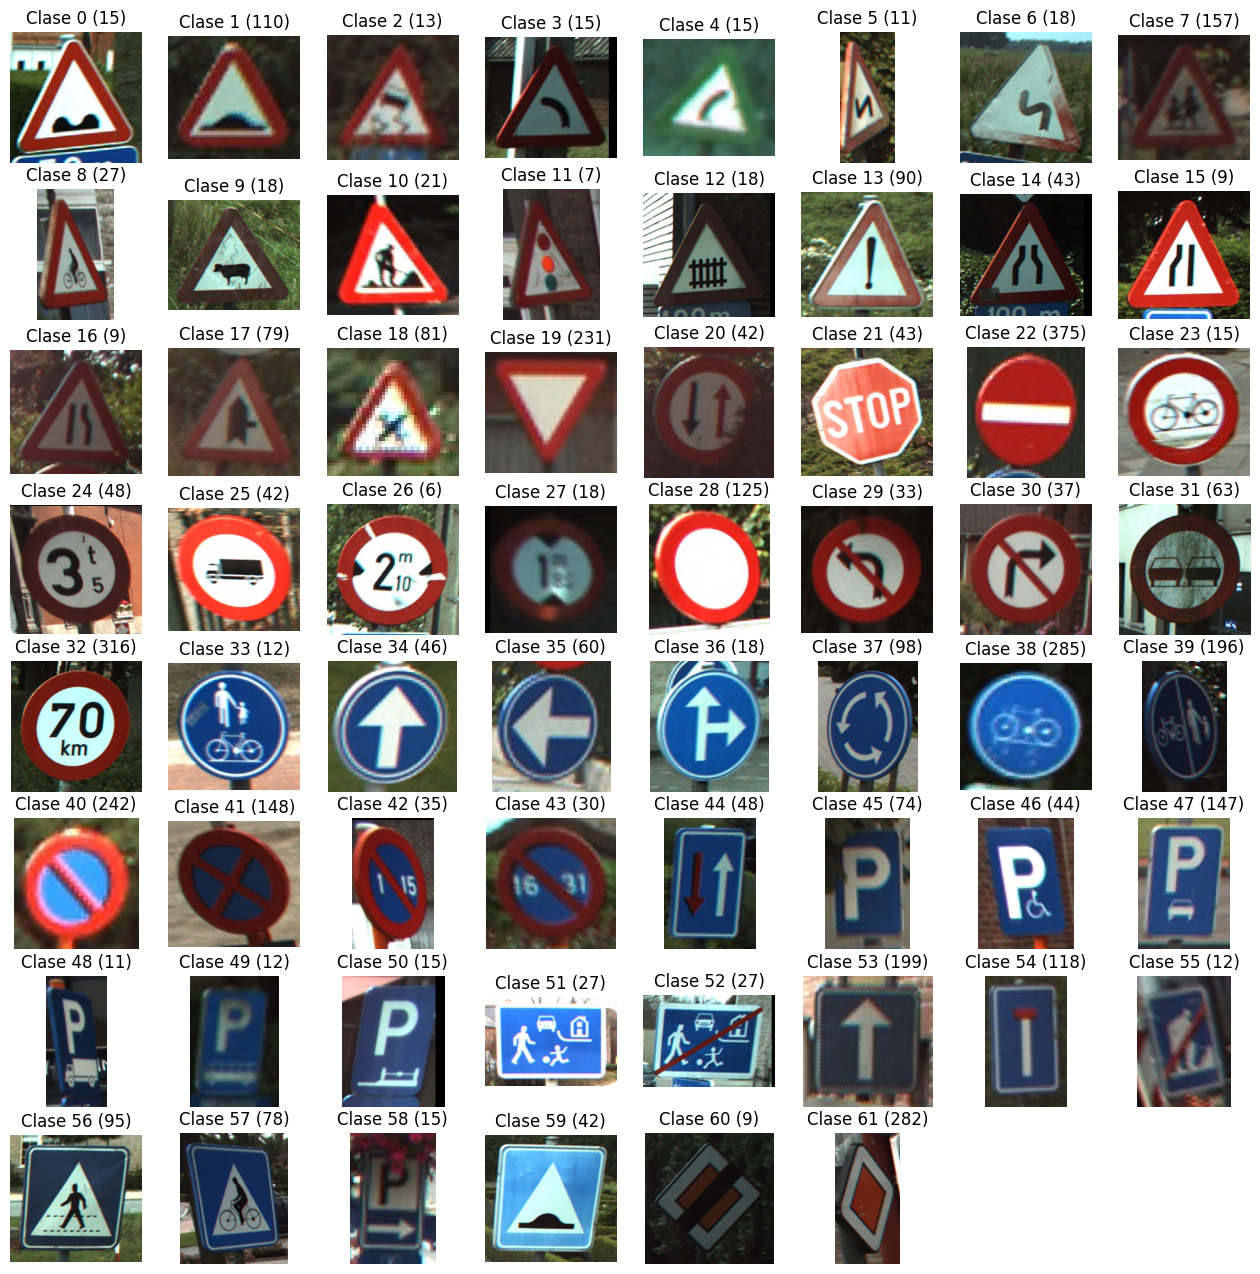

In [77]:
unique_labels = set(labels)
plt.figure(figsize = (16,16))
i = 1
for label in unique_labels:
    temp_im = images[labels.index(label)]
    plt.subplot(8, 8, i)
    plt.axis('off')
    plt.title('Clase {0} ({1})'.format(label, labels.count(label)))
    i +=1
    plt.imshow(temp_im)
plt.show()

## Modelo de Red Neuronal con TensorFlow 

* No todas las imágenes son del mismo tamaño
* Hay 62 clases de imágenes (desde la 0 hasta la 61)
* La distribución de señales de tráfico no es uniforme (más señales que otras)

In [85]:
w = 9999
h = 9999
for image in images:
    if image.shape[0] < h:
        h = image.shape[0]
    if image.shape[1] < w:
        w = image.shape[1]
print("Tamaño mínimo: {0}x{1}".format(h,w))

Tamaño mínimo: 22x20


In [98]:
images30 = [transform.resize(image, (30, 30)) for image in images]

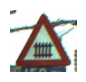

Forma:(30, 30, 3), min:0.11324937374648397, max:1.0


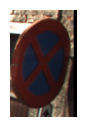

Forma:(30, 30, 3), min:0.0003218420034564913, max:0.9983148232455841


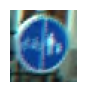

Forma:(30, 30, 3), min:0.008370138716449843, max:0.998866175211941


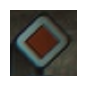

Forma:(30, 30, 3), min:0.048144766316492664, max:0.5615210123289112


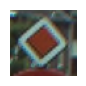

Forma:(30, 30, 3), min:0.08442129077323672, max:0.7718306804833126


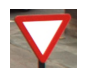

Forma:(30, 30, 3), min:0.05899700284112823, max:0.9999999999999998


In [99]:
for i in range(len(rand_signs)):
    temp_im = images30[rand_signs[i]]
    plt.subplot(1, 6, i+1)
    plt.axis('off')
    plt.imshow(images[rand_signs[i]])
    plt.subplots_adjust(wspace = 0.3)
    plt.show()
    print('Forma:{0}, min:{1}, max:{2}'.format(temp_im.shape,
                                              temp_im.min(),
                                              temp_im.max()))

In [100]:
images30 = np.array(images30)
images30 = rgb2gray(images30)

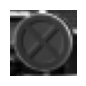

Forma:(30, 30), min:0.048255401122599136, max:0.898954166112402


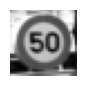

Forma:(30, 30), min:0.19052071843889307, max:0.9986365007302972


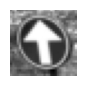

Forma:(30, 30), min:0.1873318895536757, max:0.9993392532922406


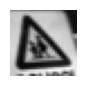

Forma:(30, 30), min:0.07848164020149194, max:0.5658779192138226


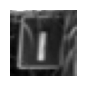

Forma:(30, 30), min:0.08661992501982176, max:0.47861786405094553


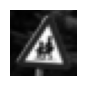

Forma:(30, 30), min:0.03027119104041841, max:0.7115468414701944


In [105]:
rand_signs = random.sample(range(0, len(labels)), 6)
rand_signs
for i in range(len(rand_signs)):
    temp_im = images30[rand_signs[i]]
    plt.subplot(1, 6, i+1)
    plt.axis('off')
    plt.imshow(temp_im, cmap = 'gray')
    plt.subplots_adjust(wspace = 0.3)
    plt.show()
    print('Forma:{0}, min:{1}, max:{2}'.format(temp_im.shape,
                                              temp_im.min(),
                                              temp_im.max()))

In [118]:
tf.compat.v1.disable_eager_execution()
x = tf.compat.v1.placeholder(dtype = tf.float32, shape = [None, 30, 30])
y = tf.compat.v1.placeholder(dtype = tf.int32, shape = [None])

images_flat = tf.compat.v1.layers.flatten(x)
logits = tf.compat.v1.layers.dense(images_flat, 62, tf.nn.relu)

loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels = y, logits = logits))

train_opt = tf.compat.v1.train.AdamOptimizer(learning_rate = 0.001).minimize(loss)

final_pred = tf.argmax(logits, 1)

accuracy = tf.reduce_mean(tf.cast(final_pred, tf.float32))

C:\Users\SANDRO\AppData\Local\Temp\ipykernel_1520\1603542380.py:5: UserWarning: `tf.layers.flatten` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Flatten` instead.
  images_flat = tf.compat.v1.layers.flatten(x)
C:\Users\SANDRO\AppData\Local\Temp\ipykernel_1520\1603542380.py:6: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  logits = tf.compat.v1.layers.dense(images_flat, 62, tf.nn.relu)


In [168]:
tf.random.set_seed(1234)
sess = tf.compat.v1.Session()
sess.run(tf.compat.v1.global_variables_initializer())

for i in range(1000):
    _, accuracy_val = sess.run([train_opt, accuracy],
                              feed_dict = {
                              x: images30,
                              y: labels
                              })
    
    #_, loss_val = sess.run([train_opt, accuracy],
    #                      feed_dict = {
    #                          x: images30,
    #                          y: labels
    #                      })
    
    if i%50 == 0:
        print("EPOCH", i)
        print("Eficacia: ", accuracy_val)
        #print("Pérdida: ", loss_val)

EPOCH 0
Eficacia:  38.48328
EPOCH 50
Eficacia:  34.522404
EPOCH 100
Eficacia:  34.833443
EPOCH 150
Eficacia:  34.744263
EPOCH 200
Eficacia:  34.55563
EPOCH 250
Eficacia:  34.39519
EPOCH 300
Eficacia:  34.288525
EPOCH 350
Eficacia:  34.211586
EPOCH 400
Eficacia:  34.137707
EPOCH 450
Eficacia:  34.079124
EPOCH 500
Eficacia:  34.04656
EPOCH 550
Eficacia:  34.031693
EPOCH 600
Eficacia:  34.039127
EPOCH 650
Eficacia:  34.024918
EPOCH 700
Eficacia:  34.006557
EPOCH 750
Eficacia:  33.96743
EPOCH 800
Eficacia:  33.92962
EPOCH 850
Eficacia:  33.922623
EPOCH 900
Eficacia:  33.90033
EPOCH 950
Eficacia:  33.882187


## Evaluación de la red neuronal

In [166]:
sample_idx = random.sample(range(len(images30)), 16)
sample_images = [images30[i] for i in sample_idx]
sample_labels = [labels[i] for i in sample_idx]

In [167]:
prediction = sess.run([final_pred], feed_dict = {x:sample_images})

In [134]:
prediction

[array([22, 53, 22, 38, 19, 39, 40,  1, 53, 32, 25, 22, 19, 40, 61, 32],
       dtype=int64)]

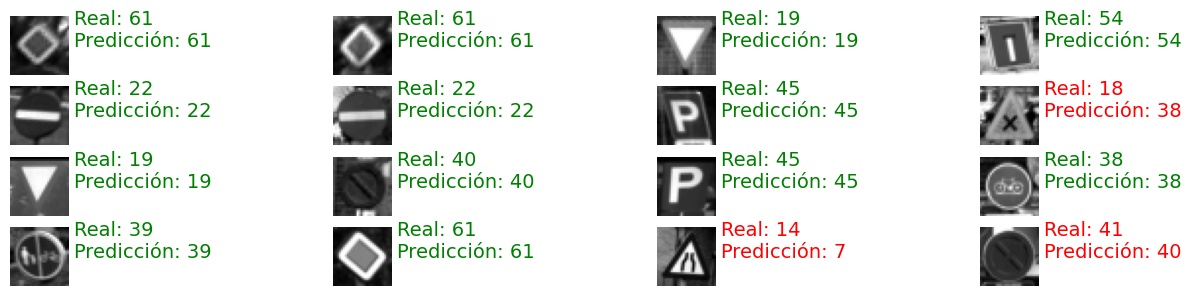

In [169]:
plt.figure(figsize = (16, 9))
for i in range(len(sample_images)):
    truth = sample_labels[i]
    predi = prediction[0][i]
    plt.subplot(10, 4, i+1)
    plt.axis("off")
    color = "green" if truth == predi else "red"
    plt.text(32, 15, "Real: {0}\nPredicción: {1}".format(truth, predi),
            fontsize = 14, color = color)
    plt.imshow(sample_images[i], cmap = "gray")

In [170]:
test_images, test_labels = load_ml_data(test_data_dir)

In [171]:
test_images30 = [transform.resize(im, (30,30)) for im in test_images]

In [172]:
test_images30 = rgb2gray(np.array(test_images30))

In [173]:
prediction = sess.run([final_pred], feed_dict = {x:test_images30})[0]

In [174]:
match_count = sum([int(l0 == lp) for l0, lp in zip(test_labels, prediction)])
match_count

1460

In [175]:
acc = match_count/len(test_labels) * 100
print("Eficacia de la red neuronal: {:.2f}".format(acc))

Eficacia de la red neuronal: 57.94
